# Terrorism in Ireland from 1970 to 2017

### Introduction

This is an analysis of terrorism in Ireland from 1970 to 2017

I found that there has not been any major research done on this specific topic.

The main theme of this research is the terrorism between groups based on religon but I have touched on other aspects.

I have chosen this topic and based it around Ireland because in recent months there has been an increase in political unrest due to the reformation of the so called "New Irish Republican Army".

### Terminology

Ireland: Inclusive of Republic of Ireland and Northern Ireland

### Background

My research and analysis has been limited due to the fact that records began in 1970 and even then were limited.

### Research Questions

What affect did religon have on terrorism in Ireland?

How did the 'Troubles' affect terroism in Ireland?

### Methodology/Methods 

As stated before my research was limited due to lack of records.
I used the dataset from the Global Terrorism Database which had a sufficent amount of records for Ireland.
Other than this database I was unable to find any more data or knowledge based on terrorism in Ireland apart from my own knowledge on the subject or that of my peers.

## Data Understanding

### Initial Data Report

In [1]:
!pip install wordcloud

In [2]:
from pandas import *
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.cluster import KMeans
from sklearn.metrics.cluster import silhouette_score
from sklearn.preprocessing import scale, robust_scale

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('terrorismIrish.csv',sep=',',encoding = "iso-8859-1",low_memory=False)

### Describe Data

In [4]:
pd.set_option("display.max_columns", None)
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'country', 'country_txt',
       'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'location',
       'summary', 'alternative_txt', 'success', 'suicide', 'attacktype1_txt',
       'targtype1_txt', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1_txt',
       'gname', 'weaptype1', 'weaptype1_txt', 'weapsubtype1_txt', 'weapdetail',
       'nkill'],
      dtype='object')

In [5]:
df.shape

(4803, 28)

In [6]:
df.dtypes

eventid             float64
iyear                 int64
imonth                int64
iday                  int64
country               int64
country_txt          object
region_txt           object
provstate            object
city                 object
latitude            float64
longitude           float64
location             object
summary              object
alternative_txt      object
success               int64
suicide               int64
attacktype1_txt      object
targtype1_txt        object
targsubtype1_txt     object
corp1                object
target1              object
natlty1_txt          object
gname                object
weaptype1             int64
weaptype1_txt        object
weapsubtype1_txt     object
weapdetail           object
nkill               float64
dtype: object

In [7]:
df.describe()

,eventid,iyear,imonth,iday,country,latitude,longitude,success,suicide,weaptype1,nkill
count,4.803000e+03,4803.000000,4803.000000,4803.000000,4803.000000,4802.000000,4802.000000,4803.000000,4803.0,4803.000000,4652.000000
mean,1.989209e+11,1989.175932,6.323756,15.535499,570.804497,54.525826,-6.379802,0.798043,0.0,6.063710,0.642519
std,1.434821e+09,13.843704,3.460179,8.798507,123.651740,0.398881,0.584168,0.401502,0.0,1.538923,1.125008
min,1.970000e+11,1970.000000,1.000000,0.000000,96.000000,51.526356,-9.547582,0.000000,0.0,2.000000,0.000000
25%,1.980000e+11,1977.000000,3.000000,8.000000,603.000000,54.463367,-6.656108,1.000000,0.0,5.000000,0.000000
50%,1.990000e+11,1987.000000,6.000000,15.000000,603.000000,54.607712,-5.981720,1.000000,0.0,6.000000,0.000000
75%,2.000000e+11,1997.000000,9.000000,23.000000,603.000000,54.607712,-5.956210,1.000000,0.0,6.000000,1.000000
max,2.020000e+11,2017.000000,12.000000,31.000000,603.000000,55.206863,-5.448951,1.000000,0.0,13.000000,29.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 28 columns):
eventid             4803 non-null float64
iyear               4803 non-null int64
imonth              4803 non-null int64
iday                4803 non-null int64
country             4803 non-null int64
country_txt         4803 non-null object
region_txt          4803 non-null object
provstate           4803 non-null object
city                4803 non-null object
latitude            4802 non-null float64
longitude           4802 non-null float64
location            933 non-null object
summary             1177 non-null object
alternative_txt     969 non-null object
success             4803 non-null int64
suicide             4803 non-null int64
attacktype1_txt     4803 non-null object
targtype1_txt       4803 non-null object
targsubtype1_txt    4457 non-null object
corp1               3039 non-null object
target1             4792 non-null object
natlty1_txt         4790 non-null obj

In [9]:
df.head(5)

,eventid,iyear,imonth,iday,country,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,alternative_txt,success,suicide,attacktype1_txt,targtype1_txt,targsubtype1_txt,corp1,target1,natlty1_txt,gname,weaptype1,weaptype1_txt,weapsubtype1_txt,weapdetail,nkill
0,1.970000e+11,1970,4,3,96,Ireland,Western Europe,Dublin,Dublin,53.361675,-6.245485,NaN,NaN,NaN,1,0,Armed Assault,Business,Bank/Commerce,Bank of Ireland,"Richard Fallon, 42, Garda Siochana",Ireland,Saor Eire (Irish Republican Group),5,Firearms,Unknown Gun Type,Firearm,1.0
1,1.970000e+11,1970,6,26,603,United Kingdom,Western Europe,Northern Ireland,Londonderry,55.011562,-7.312045,NaN,NaN,NaN,0,0,Armed Assault,Terrorists/Non-State Militia,Terrorist,NaN,"3 IRA members, 2 civilians",Northern Ireland,Irish Republican Army (IRA),8,Incendiary,NaN,Incendiary,5.0
2,1.970000e+11,1970,6,27,603,United Kingdom,Western Europe,Northern Ireland,Londonderry,55.011562,-7.312045,NaN,NaN,NaN,1,0,Armed Assault,Private Citizens & Property,Religion Identified,NaN,"William Kincaid, 28, Daniel Loughins, 32 and A...",Northern Ireland,Irish Republican Army (IRA),5,Firearms,Unknown Gun Type,Firearm,3.0
3,1.970000e+11,1970,6,27,603,United Kingdom,Western Europe,Northern Ireland,Belfast,54.607712,-5.956210,NaN,NaN,NaN,1,0,Armed Assault,Private Citizens & Property,Religion Identified,NaN,"Robert Neill, 38, protestant",Northern Ireland,Irish Republican Army (IRA),5,Firearms,Unknown Gun Type,Firearm,1.0
4,1.970000e+11,1970,6,27,603,United Kingdom,Western Europe,Northern Ireland,Belfast,54.607712,-5.956210,NaN,NaN,NaN,1,0,Armed Assault,Private Citizens & Property,Religion Identified,NaN,"James McCurrie, 34, Protestant",Northern Ireland,Irish Republican Army (IRA),5,Firearms,Unknown Gun Type,Firearm,1.0


### Missing Data

In [10]:
df.isnull().sum()

eventid                0
iyear                  0
imonth                 0
iday                   0
country                0
country_txt            0
region_txt             0
provstate              0
city                   0
latitude               1
longitude              1
location            3870
summary             3626
alternative_txt     3834
success                0
suicide                0
attacktype1_txt        0
targtype1_txt          0
targsubtype1_txt     346
corp1               1764
target1               11
natlty1_txt           13
gname                  0
weaptype1              0
weaptype1_txt          0
weapsubtype1_txt     455
weapdetail           763
nkill                151
dtype: int64

In [11]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [12]:
missing_values_table(df)

Your selected dataframe has 28 columns.
There are 12 columns that have missing values.


,Missing Values,% of Total Values
location,3870,80.6
alternative_txt,3834,79.8
summary,3626,75.5
corp1,1764,36.7
weapdetail,763,15.9
weapsubtype1_txt,455,9.5
targsubtype1_txt,346,7.2
nkill,151,3.1
natlty1_txt,13,0.3
target1,11,0.2


## Initial Data Exploration

### Distributions

In [13]:
def count_values_table(df):
        count_val = df.value_counts()
        count_val_percent = 100 * df.value_counts() / len(df)
        count_val_table = pd.concat([count_val, count_val_percent.round(1)], axis=1)
        count_val_table_ren_columns = count_val_table.rename(
        columns = {0 : 'Count Values', 1 : '% of Total Values'})
        return count_val_table_ren_columns

In [14]:
# Histogram
def hist_chart(df, col):
        plt.style.use('fivethirtyeight')
        plt.hist(df[col].dropna(), edgecolor = 'k');
        plt.xlabel(col); plt.ylabel('Number of Entries'); 
        plt.title('Distribution of '+col);

,success,success
1,3833,79.8
0,970,20.2


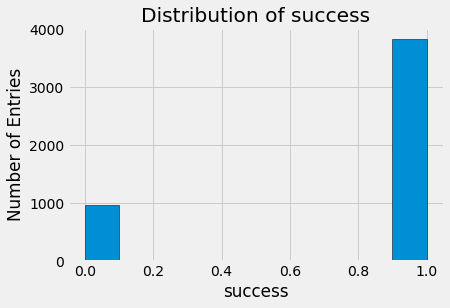

In [15]:
col = 'success'
# Histogram & Results
hist_chart(df, col)
count_values_table(df.success)

### Data Quality Report

In [16]:
columns = pd.DataFrame(list(df.columns.values))
columns

,0
0,eventid
1,iyear
2,imonth
3,iday
4,country
5,country_txt
6,region_txt
7,provstate
8,city
9,latitude


In [17]:
data_types = pd.DataFrame(df.dtypes,
                          columns=['Data Type'])
data_types

,Data Type
eventid,float64
iyear,int64
imonth,int64
iday,int64
country,int64
country_txt,object
region_txt,object
provstate,object
city,object
latitude,float64


In [18]:
missing_data_counts = pd.DataFrame(df.isnull().sum(),
                                   columns=['Missing Values'])
missing_data_counts

,Missing Values
eventid,0
iyear,0
imonth,0
iday,0
country,0
country_txt,0
region_txt,0
provstate,0
city,0
latitude,1


In [19]:
present_data_counts = pd.DataFrame(df.count(),
                                   columns=['Present Values'])
present_data_counts

,Present Values
eventid,4803
iyear,4803
imonth,4803
iday,4803
country,4803
country_txt,4803
region_txt,4803
provstate,4803
city,4803
latitude,4802


In [20]:
unique_value_counts = pd.DataFrame(columns=['Unique Values'])
for v in list(df.columns.values):
    unique_value_counts.loc[v] = [df[v].nunique()]
unique_value_counts

,Unique Values
eventid,6
iyear,47
imonth,12
iday,32
country,2
country_txt,2
region_txt,1
provstate,23
city,421
latitude,572


In [21]:
data_quality_report = data_types.join(present_data_counts).join(missing_data_counts).join(unique_value_counts)

In [22]:
print("\nData Quality Report")
print("Total records: {}".format(len(df.index)))
data_quality_report


Data Quality Report
Total records: 4803


,Data Type,Present Values,Missing Values,Unique Values
eventid,float64,4803,0,6
iyear,int64,4803,0,47
imonth,int64,4803,0,12
iday,int64,4803,0,32
country,int64,4803,0,2
country_txt,object,4803,0,2
region_txt,object,4803,0,1
provstate,object,4803,0,23
city,object,4803,0,421
latitude,float64,4802,1,572


## Data Preperation

### Clean The Data

In [23]:
df['location'] = df.location.fillna('')
df['alternative_txt'] = df.alternative_txt.fillna('')
df['summary'] = df.summary.fillna('')
df['corp1'] = df.corp1.fillna('')
df['weapsubtype1_txt'] = df.weapsubtype1_txt.fillna('')

In [24]:
df['gname'] = df['gname'].replace("Unknown","Not Claimed")

## Modelling

The modelling technique used is K-Means Clustering 

In [25]:
eachYear = df['iyear'].value_counts()
print(eachYear)


1972    286
1991    230
1994    224
1979    217
1992    204
1976    194
1973    178
1975    172
1974    166
1983    162
1988    149
2013    144
1977    136
1989    134
1984    133
2015    131
1987    128
1981    126
1980    124
1990    116
2014    113
2017    107
2016    101
1982     94
1986     92
1978     84
2001     80
1971     80
1997     77
2012     76
1999     71
1985     63
1998     61
2010     59
2000     51
2011     49
2008     34
1996     29
2003     24
2009     21
1995     20
2002     18
2005     16
1970     11
2007     10
2004      4
2006      4
Name: iyear, dtype: int64


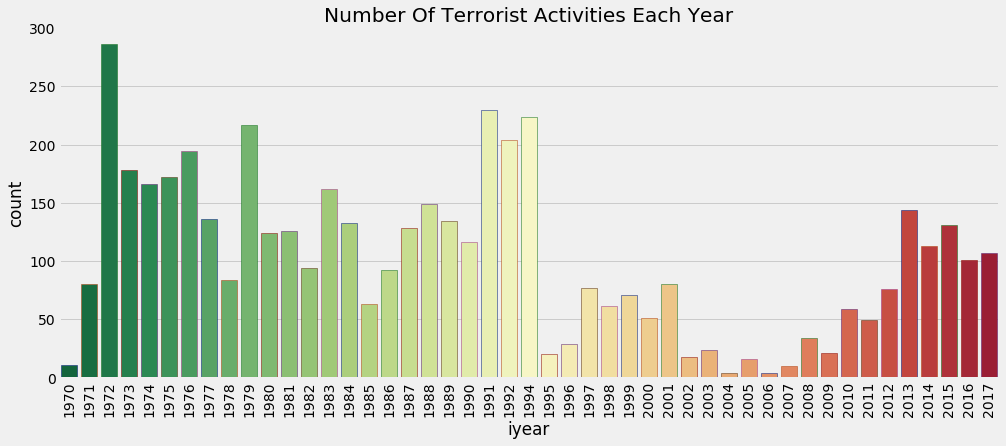

In [26]:
plt.subplots(figsize=(15,6))
sns.countplot('iyear',data=df,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

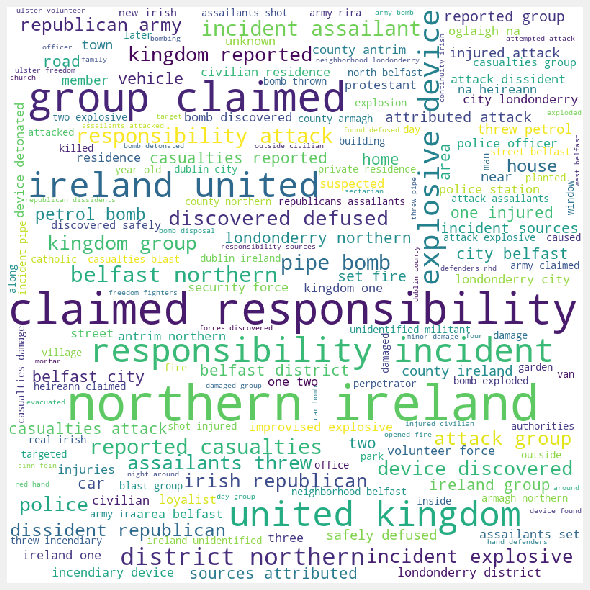

In [27]:
comment_words = ' '
stopwords = set(STOPWORDS) 
for val in df.summary: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

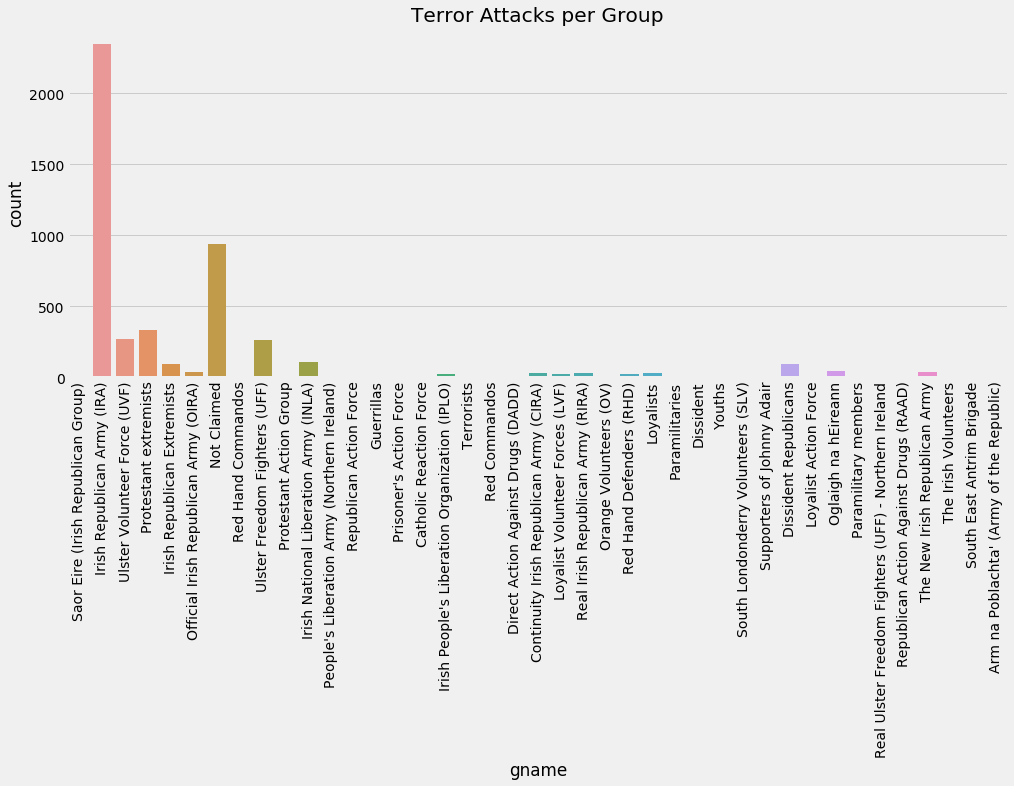

In [28]:
plt.subplots(figsize=(15,6))
sns.countplot('gname',data=df)
plt.xticks(rotation=90)
plt.title('Terror Attacks per Group')
plt.show()


In [29]:
# outlier removal - remove massive terrorist attacks
df = df[df['nkill'] <= 4].reset_index(drop=True)
df.head()

,eventid,iyear,imonth,iday,country,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,alternative_txt,success,suicide,attacktype1_txt,targtype1_txt,targsubtype1_txt,corp1,target1,natlty1_txt,gname,weaptype1,weaptype1_txt,weapsubtype1_txt,weapdetail,nkill
0,1.970000e+11,1970,4,3,96,Ireland,Western Europe,Dublin,Dublin,53.361675,-6.245485,,,,1,0,Armed Assault,Business,Bank/Commerce,Bank of Ireland,"Richard Fallon, 42, Garda Siochana",Ireland,Saor Eire (Irish Republican Group),5,Firearms,Unknown Gun Type,Firearm,1.0
1,1.970000e+11,1970,6,27,603,United Kingdom,Western Europe,Northern Ireland,Londonderry,55.011562,-7.312045,,,,1,0,Armed Assault,Private Citizens & Property,Religion Identified,,"William Kincaid, 28, Daniel Loughins, 32 and A...",Northern Ireland,Irish Republican Army (IRA),5,Firearms,Unknown Gun Type,Firearm,3.0
2,1.970000e+11,1970,6,27,603,United Kingdom,Western Europe,Northern Ireland,Belfast,54.607712,-5.956210,,,,1,0,Armed Assault,Private Citizens & Property,Religion Identified,,"Robert Neill, 38, protestant",Northern Ireland,Irish Republican Army (IRA),5,Firearms,Unknown Gun Type,Firearm,1.0
3,1.970000e+11,1970,6,27,603,United Kingdom,Western Europe,Northern Ireland,Belfast,54.607712,-5.956210,,,,1,0,Armed Assault,Private Citizens & Property,Religion Identified,,"James McCurrie, 34, Protestant",Northern Ireland,Irish Republican Army (IRA),5,Firearms,Unknown Gun Type,Firearm,1.0
4,1.970000e+11,1970,6,27,603,United Kingdom,Western Europe,Northern Ireland,Belfast,54.607712,-5.956210,,,,1,0,Armed Assault,Religious Figures/Institutions,Place of Worship,Catholic enclave,St. Matthew,Northern Ireland,Ulster Volunteer Force (UVF),5,Firearms,Unknown Gun Type,Firearm; Petroleum bomb,3.0


In [30]:
features = [
    'longitude',
    'latitude',
    
    'nkill',
    
    'gname',
    'targtype1_txt',
    'targsubtype1_txt',
    'weaptype1_txt',
    'attacktype1_txt',
]

X = pd.get_dummies(df[features])
X = X.T[X.var() > 0.05].T.fillna(0)
X = X.fillna(0)

print('Shape:', X.shape)
X.head()

Shape: (4612, 24)


,longitude,latitude,nkill,gname_Irish Republican Army (IRA),gname_Not Claimed,gname_Protestant extremists,gname_Ulster Freedom Fighters (UFF),gname_Ulster Volunteer Force (UVF),targtype1_txt_Business,targtype1_txt_Military,targtype1_txt_Police,targtype1_txt_Private Citizens & Property,targsubtype1_txt_House/Apartment/Residence,"targsubtype1_txt_Military Personnel (soldiers, troops, officers, forces)",targsubtype1_txt_Police Security Forces/Officers,targsubtype1_txt_Religion Identified,targsubtype1_txt_Retail/Grocery/Bakery,weaptype1_txt_Explosives,weaptype1_txt_Firearms,weaptype1_txt_Incendiary,attacktype1_txt_Armed Assault,attacktype1_txt_Assassination,attacktype1_txt_Bombing/Explosion,attacktype1_txt_Facility/Infrastructure Attack
0,-6.245485,53.361675,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,-7.312045,55.011562,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,-5.956210,54.607712,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,-5.956210,54.607712,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,-5.956210,54.607712,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [31]:
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_palette('coolwarm')
sns.set_color_codes('bright')

2, 3, 4, 5, 6, 7, 8, 9, 10, 

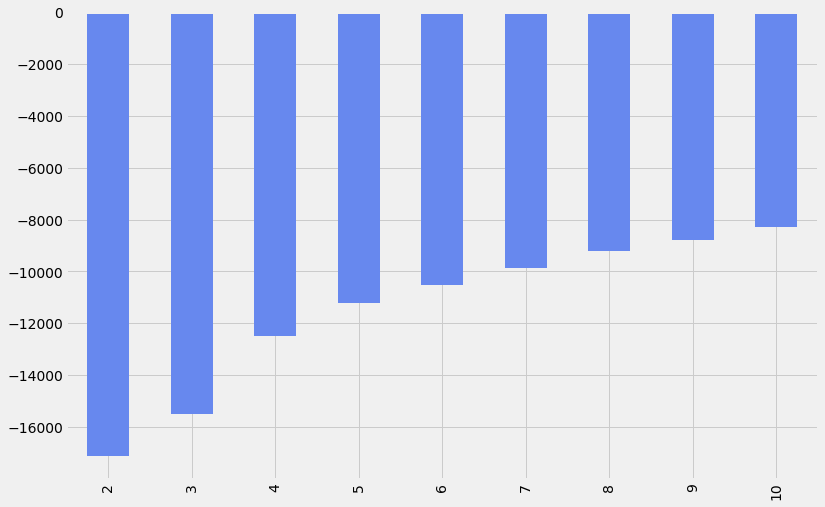

In [32]:
scores = {}
for k in range(2, 11):
    print(k, end=', ')
    scores[k] = KMeans(n_clusters=k).fit(X).score(X)
_ = pd.Series(scores).plot.bar()

In [33]:
df['Cluster'] = KMeans(n_clusters=6).fit_predict(X) + 1
print('Silhouette Score:', silhouette_score(X, df['Cluster'], sample_size=10000) * 10000 // 1 / 100, '%')

Silhouette Score: 22.88 %


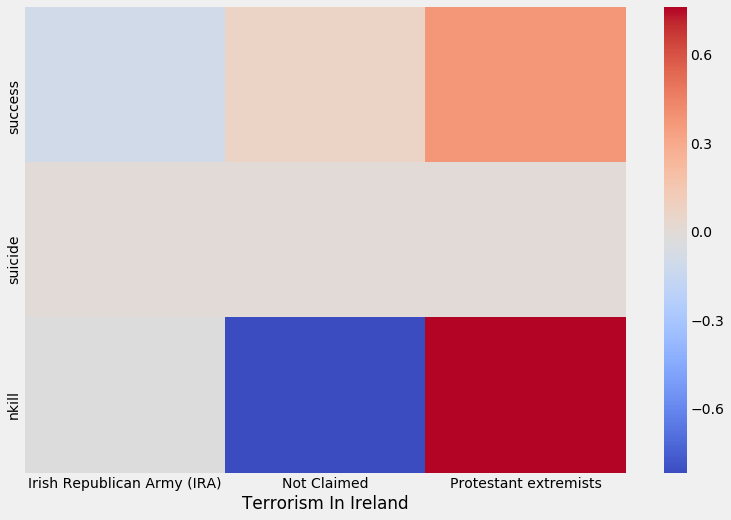

In [34]:
names = df.groupby('Cluster')['gname'].describe()['top'].values
df['Terrorism In Ireland'] = df['Cluster'].apply(lambda c: names[c - 1])

numerical = df.dtypes[df.dtypes != 'object'].keys()
exclude = [
    'eventid', 'Cluster', 'country', 'iyear', 'imonth', 'iday'
] + [col for col in numerical if 'type' in col or 'mode' in col or 'ransom' in col]
X_profiling = df[numerical.drop(exclude)].fillna(0)
X_profiling = pd.DataFrame(scale(X_profiling), columns=X_profiling.columns)
X_profiling['Terrorism In Ireland'] = df['Terrorism In Ireland']
_ = sns.heatmap(X_profiling.groupby('Terrorism In Ireland').mean().drop(['longitude', 'latitude'], axis=1).T, 
               cmap='coolwarm')

In [35]:
print('Similarity between cluster and Group labels:', 
      len(df[df['gname'] == df['Terrorism In Ireland']]) / len(df) * 10000 // 1 / 100, '%')

Similarity between cluster and Group labels: 51.4 %


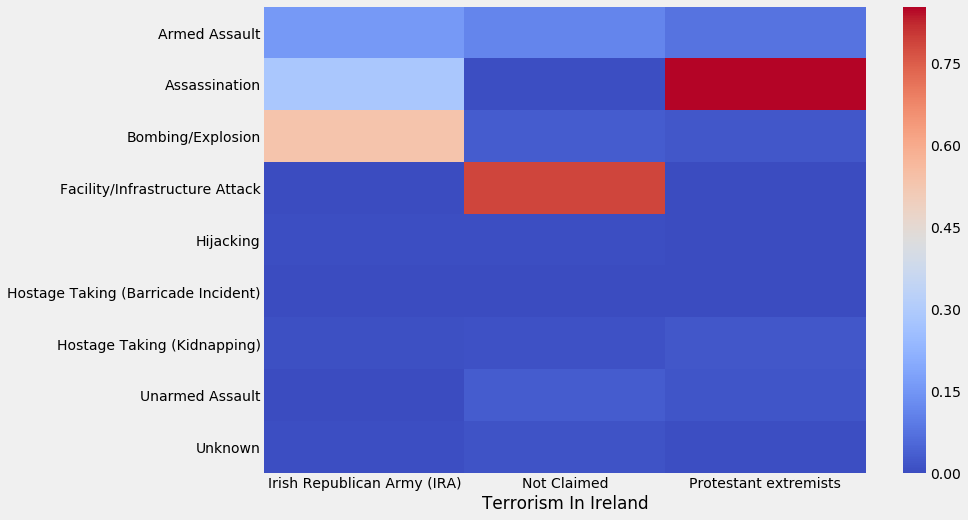

In [36]:
d = pd.get_dummies(df['attacktype1_txt'])
d['Terrorism In Ireland'] = df['Terrorism In Ireland']
_ = sns.heatmap(d.groupby('Terrorism In Ireland').mean().T, cmap='coolwarm')


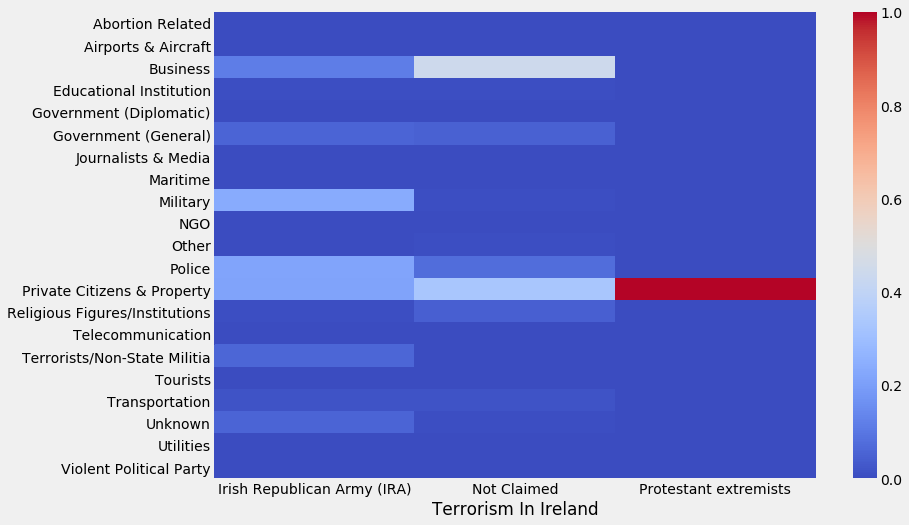

In [37]:
d = pd.get_dummies(df['targtype1_txt'])
d['Terrorism In Ireland'] = df['Terrorism In Ireland']
_ = sns.heatmap(d.groupby('Terrorism In Ireland').mean().T, cmap='coolwarm')

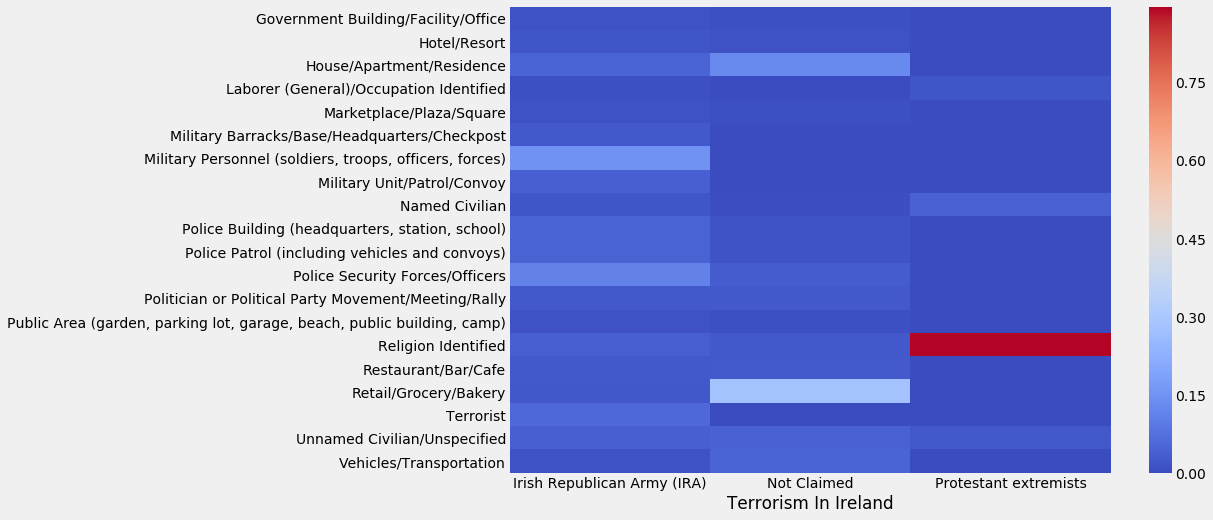

In [38]:
top = df['targsubtype1_txt'].value_counts().head(20).keys().tolist()
d = pd.get_dummies(df['targsubtype1_txt'].apply(lambda x: x if x in top else None))
d['Terrorism In Ireland'] = df['Terrorism In Ireland']
_ = sns.heatmap(d.groupby('Terrorism In Ireland').mean().T, cmap='coolwarm')

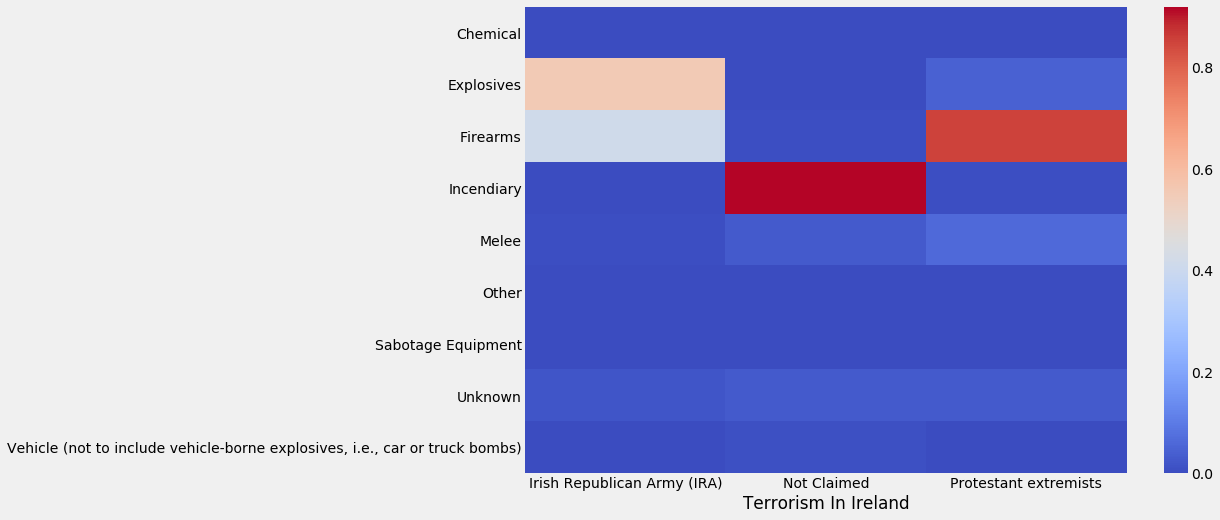

In [39]:
d = pd.get_dummies(df['weaptype1_txt'])
d['Terrorism In Ireland'] = df['Terrorism In Ireland']
_ = sns.heatmap(d.groupby('Terrorism In Ireland').mean().T, cmap='coolwarm')

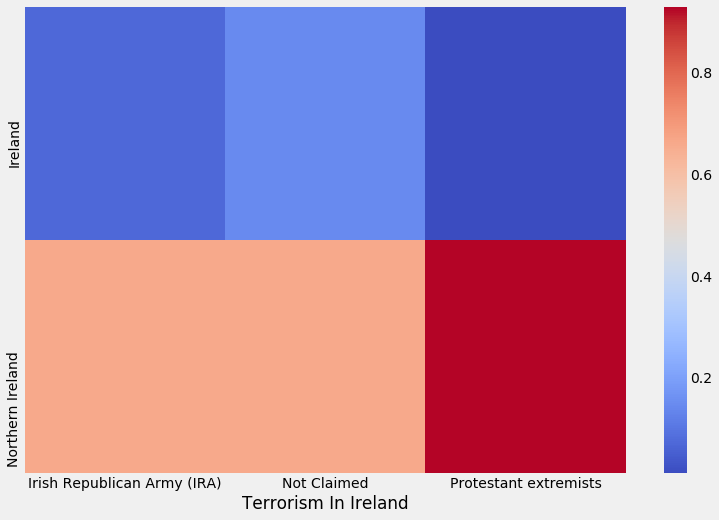

In [40]:
top_natls = ['Ireland','Northern Ireland']
natl = df['natlty1_txt'].apply(lambda x: x if x in top_natls else None)
d = pd.get_dummies(natl)
d['Terrorism In Ireland'] = df['Terrorism In Ireland']
_ = sns.heatmap(d.groupby('Terrorism In Ireland').mean().T, cmap='coolwarm')

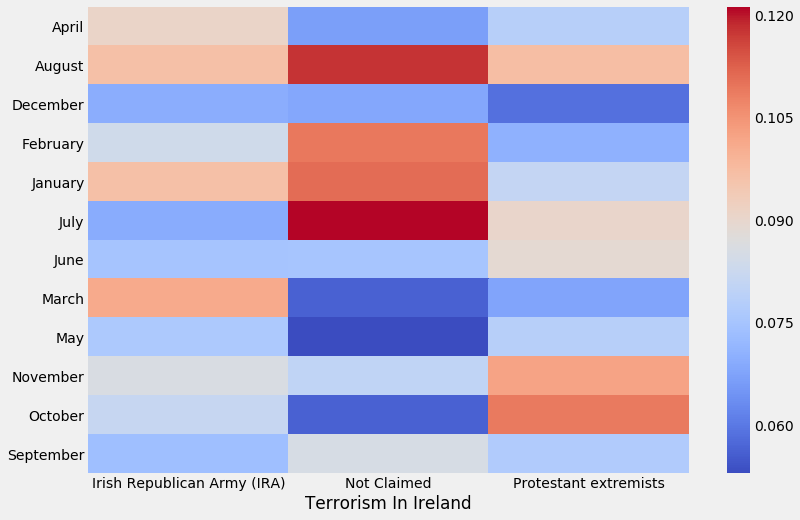

In [41]:
months = ['', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
d = pd.get_dummies(df['imonth'].apply(lambda x: None if x == 0 else months[int(x)]))
d['Terrorism In Ireland'] = df['Terrorism In Ireland']
_ = sns.heatmap(d.groupby('Terrorism In Ireland').mean().T, cmap='coolwarm')

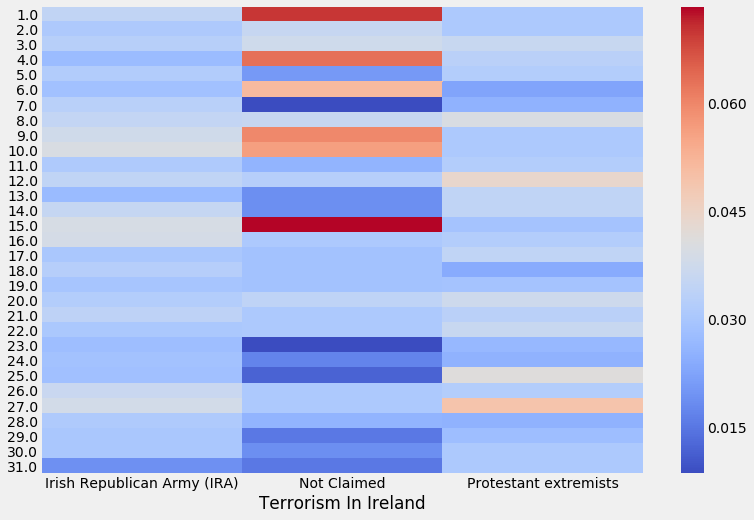

In [42]:
d = pd.get_dummies(df['iday'].apply(lambda x: None if x == 0 else int(x)))
d['Terrorism In Ireland'] = df['Terrorism In Ireland']
_ = sns.heatmap(d.groupby('Terrorism In Ireland').mean().T, cmap='coolwarm')

## Discussion & Conclusion

From my findings the I can confirm that the majority of the terrorist attacks were mainly based around Religon. 
The biggest split was between the Catolic Irish Republican Army and the Protestant Extremists.
This can be seen from 'Religion Identified' being the most common target for terrorist attacks.

From my findings I can also confirm that the majority of terrorist attacks took place during the 'Troubles' period 
of 1970 - 1998 and after this period there was a major decline.

Overall I belive that the modelling and discovery techniques I used were a success as even with limited data I was confidently 
able to aswer my research questions.

## Reference List/Bibliography

packtpub, 2015. Creating a data quality report. [online] Available at: <https://subscription.packtpub.com/book/application_development/9781785287466/3/ch03lvl1sec47/creating-a-data-quality-report> [Accessed 29 November 2019].

DataCamp, 2019. Generating WordClouds in Python. [online] Available at: <https://www.datacamp.com/community/tutorials/wordcloud-python> [Accessed 25 November 2019].

kaggle, 2018. Profiling Terrorists: K-means Clustering [online] Available at: <https://www.kaggle.com/ianchute/profiling-terrorists-k-means-clustering> [Accessed 29 November 2019].